In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(r'D:\Documents\PASTIME\CODING\Python\freecodecamp\data analysis\adult.data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
dtype: int64


c:\Users\platy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Different races')

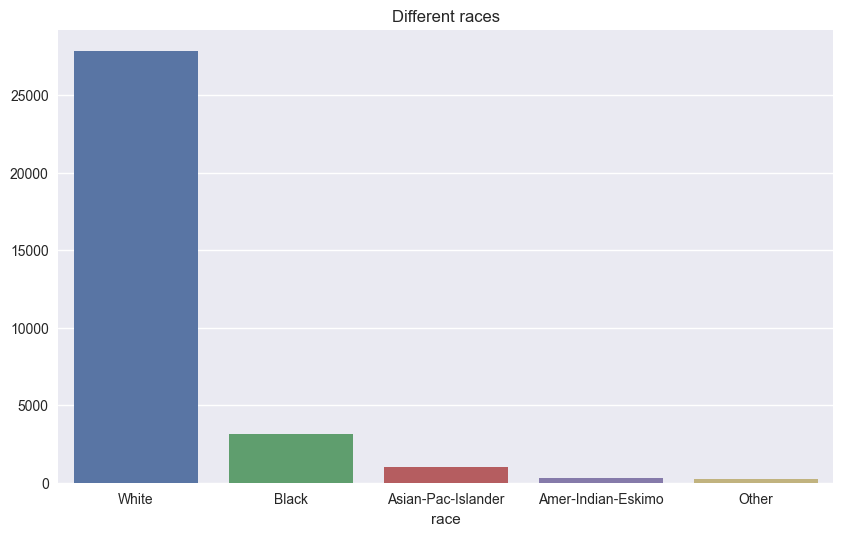

In [107]:
race_count = df.groupby('race').size().sort_values(ascending = False)
print(race_count)

fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
plt.style.use('seaborn')
sns.barplot(race_count.index, race_count.values, ax = ax)
ax.set_title('Different races', size = 12)


Average age of men: 39.4


Text(0.5, 1.0, 'Average Men Age')

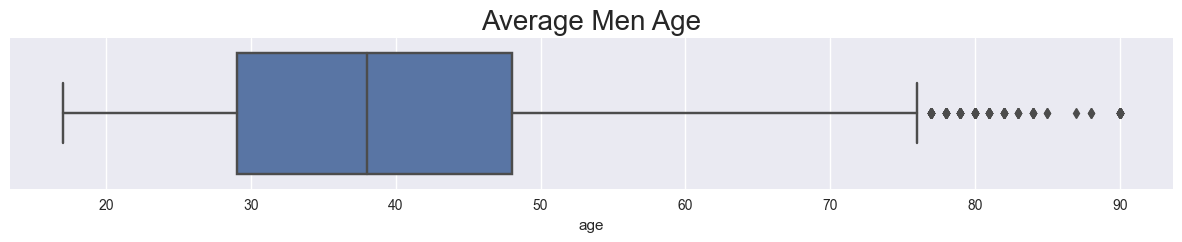

In [48]:
average_age_men = float("%.1f"%df.loc[df['sex'] == 'Male', 'age'].mean())
print("Average age of men:", average_age_men)

fig, ax = plt.subplots(figsize = (15, 2), dpi = 100)
sns.boxplot(x = df.loc[df['sex'] == 'Male', 'age'])
ax.set_title('Average Men Age', size = 20)


Percentage with Bachelors degrees: 16.400000000000002%


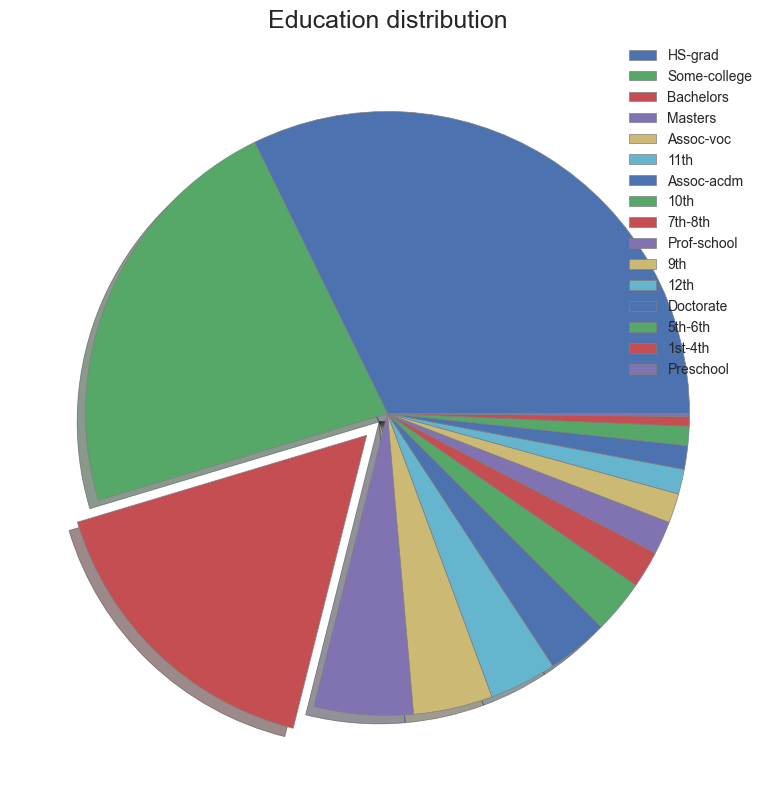

In [104]:
percentage_bachelors = float("%.3f"%(df.loc[df['education'] == 'Bachelors', 'education'].count() / len(df['education']))) * 100
print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
explode = np.zeros(16)
explode[2] = 0.1

fig, ax = plt.subplots(figsize = (10, 10), dpi = 100)
ax.pie(df['education'].value_counts(), shadow = True, explode = explode, wedgeprops={"edgecolor":"grey",'linewidth': 0.5})
ax.set_title('Education distribution', size = 18)
ax.legend(df['education'].value_counts().index)
ax.set_alpha(0.9)

In [109]:
ed_mask = (df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')
r_mask = df['salary'] == '>50K'

higher_education = float("%.3f"%(df.loc[ed_mask, 'education'].count() / len(df['education']))) * 100
lower_education = 100 - higher_education

print(f"Percentage of people with higher education: {higher_education}%")
print(f"Percentage of people with lower education: {lower_education}%")


Percentage of people with higher education: 23.0%
Percentage of people with lower education: 77.0%


Percentage of people with higher education that earn > 50K: 46.5%
Percentage of people without higher education that earn > 50K: 17.4%


Text(0.5, 1.0, 'Procent of people with salary > 50K')

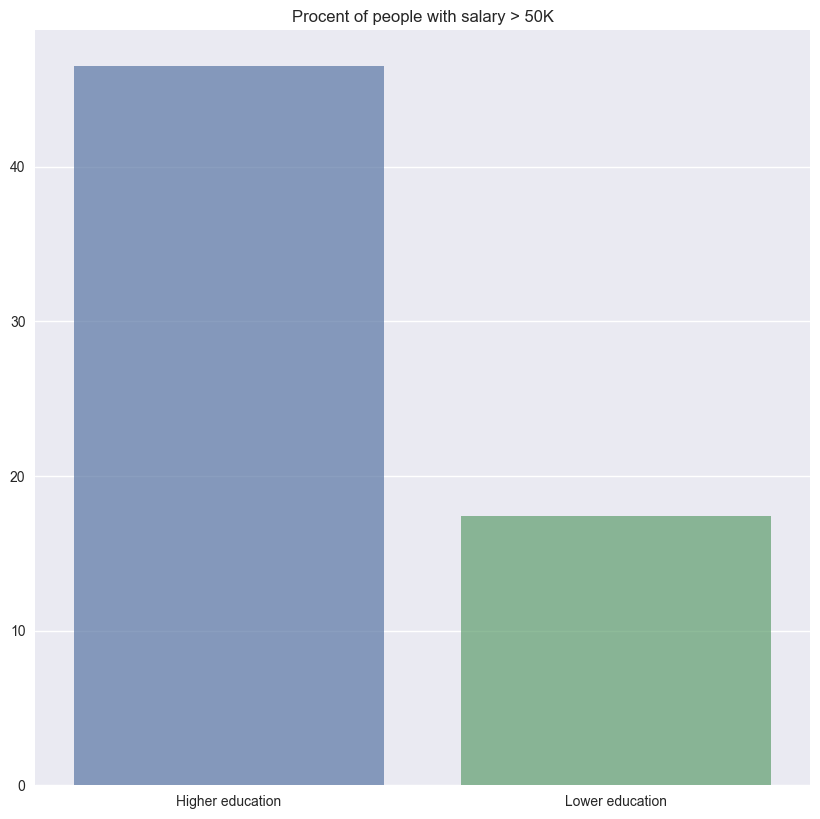

In [81]:

higher_education_rich = float("%.3f"%(df.loc[(ed_mask) & (r_mask), 'education'].count() / len(df[ed_mask]))) * 100

lower_education_rich = float("%.3f"%(df.loc[(~ed_mask) & (r_mask), 'education'].count() / len(df[~ed_mask]))) * 100

print(f"Percentage of people with higher education that earn > 50K: {higher_education_rich}%")
print(f"Percentage of people without higher education that earn > 50K: {lower_education_rich}%")

fig, ax = plt.subplots(figsize = (10, 10), dpi = 100)
sns.barplot(x = ['Higher education', 'Lower education'], y = [higher_education_rich, lower_education_rich], alpha = .7)
ax.set_title('Procent of people with salary > 50K')

In [65]:
min_work_hours = df['hours-per-week'].min()
print(f"Min work time: {min_work_hours} hour pro week")

Min work time: 1 hour pro week


In [112]:
h_mask = df['hours-per-week'] == min_work_hours

num_min_workers = df.loc[h_mask, 'hours-per-week'].count()
print(f"Percentage of the people who work the minimum number of hours per week: {num_min_workers}%")

rich_percentage = int(df.loc[(h_mask) & (r_mask), 'hours-per-week'].count() / num_min_workers * 100)
print(f"Percentage of the people who work the minimum number of hours per week have a salary of > 50K: {num_min_workers}%")

Percentage of the people who work the minimum number of hours per week: 20%
Percentage of the people who work the minimum number of hours per week have a salary of > 50K: 20%


In [116]:
highest_earning_country = (df.loc[r_mask].groupby('native-country').size() / df.groupby('native-country').size()).sort_values(ascending=False).first_valid_index()
highest_earning_country_percentage = float("%.3f"%((df.loc[r_mask].groupby('native-country').size() / df.groupby('native-country').size()).sort_values(ascending=False)[0])) * 100

print(f"Highest earning country is: {highest_earning_country}, with procent of rich people: {highest_earning_country_percentage}%")

Highest earning country is: Iran, with procent of rich people: 41.9%


Identify the most popular occupation for those who earn > 50K in India.

In [114]:
top_IN_occupation = df.loc[(r_mask) & (df['native-country'] == 'India')].groupby('occupation').size().sort_values().last_valid_index()
print(f"The most popular occupation for those who earn >50K in India: {top_IN_occupation}")

The most popular occupation for those who earn >50K in India: Prof-specialty
